In [1]:
import sys
sys.path.append('../qubo')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import polynomial
import yaml

## Inventory ##

In [2]:
d = pd.read_csv('../qubo/data/instances/inventory.csv', index_col=['instance', 'penalty_weight_conflict', 'penalty_weight_unique', 'embedding'])
d.head(18)

NLogQubits  \
instance                                           penalty_weight_conflict penalty_weight_unique embedding               
data/instances/instances_d3/atm_instance_partit... 0.5                     0.5                   NaN                14   
                                                                                                 0.0                14   
                                                                                                 1.0                14   
                                                                                                 2.0                14   
                                                                                                 3.0                14   
                                                                                                 4.0                14   
data/instances/instances_d3/atm_instance_partit... 0.5                     0.5                   NaN                14   
                                                                                                 0.0                14   
                                                                                                 1.0                14   
                                                                                                 2.0                14   
                                                                                                 3.0                14   
                                                                                                 4.0                14   
data/instances/instances_d3/atm_instance_partit... 0.5                     0.5                   NaN                14   
                                                                                                 0.0                14   
                                                                                                 1.0                14   
                                                                                                 2.0                14   
                                                                                                 3.0                14   
                                                                                                 4.0                14   

                                                                                                            NPhysQubits  \
instance                                           penalty_weight_conflict penalty_weight_unique embedding                
data/instances/instances_d3/atm_instance_partit... 0.5                     0.5                   NaN                NaN   
                                                                                                 0.0               47.0   
                                                                                                 1.0               46.0   
                                                                                                 2.0               47.0   
                                                                                                 3.0               40.0   
                                                                                                 4.0               52.0   
data/instances/instances_d3/atm_instance_partit... 0.5                     0.5                   NaN                NaN   
                                                                                                 0.0               48.0   
                                                                                                 1.0               38.0   
                                                                                                 2.0               54.0   
                                                                                                 3.0               39.0   
                                                                    

In [3]:
%matplotlib inline

## Number of logical and physical qubits ##

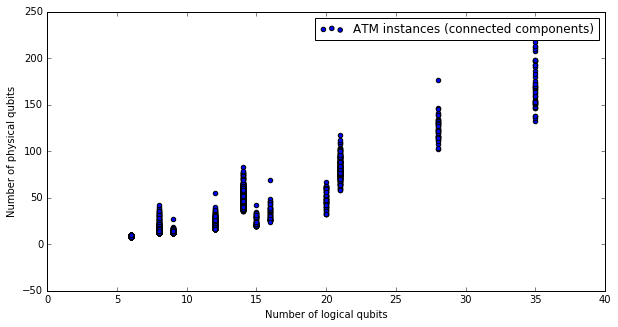

In [5]:
dvalid = d[d['isValid']==True]
nLogQubitsSuccess = dvalid.NLogQubits
nPhyQubitsSuccess = dvalid.NPhysQubits
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(nLogQubitsSuccess, nPhyQubitsSuccess, label='ATM instances (connected components)');
ax.set_xlabel('Number of logical qubits')
ax.set_ylabel('Number of physical qubits')
ax.legend();
plt.show();

## Success probability in dependence of the number of delay steps ##

In [6]:
dvalid = d[d['isValid']==True]
dd = dvalid.reset_index()
ddd = dd[dd.instance.apply(lambda e: "_d9" in e)]
successProb_d9 = ddd['SuccessProbability'].dropna().values

ddd = dd[dd.instance.apply(lambda e: "_d6" in e)]
successProb_d6 = ddd['SuccessProbability'].dropna().values

ddd = dd[dd.instance.apply(lambda e: "_d3" in e)]
successProb_d3 = ddd['SuccessProbability'].dropna().values

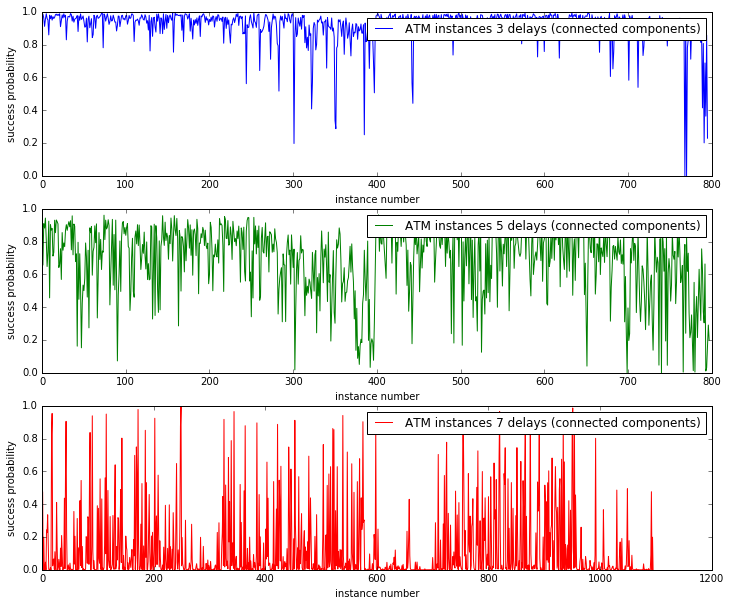

In [10]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(3, 1, 1)
ax1.set_xlabel('instance number')
ax1.set_ylabel('success probability')

ax2 = fig.add_subplot(3, 1, 2)
ax2.set_xlabel('instance number')
ax2.set_ylabel('success probability')

ax3 = fig.add_subplot(3, 1, 3)
ax3.set_xlabel('instance number')
ax3.set_ylabel('success probability')

ax1.plot(successProb_d9, label='ATM instances 3 delays (connected components)');
ax2.plot(successProb_d6, c='g', label='ATM instances 5 delays (connected components)');
ax3.plot(successProb_d3, c='r', label='ATM instances 7 delays (connected components)');

ax1.legend()
ax2.legend()
ax3.legend()

plt.show();

## Add number of conflicts, number of flights and partition number as columns to the inventory ##

In [29]:
d = pd.read_csv('../qubo/data/instances/inventory.csv')

In [30]:
def parseInstance(instancefile):
    delay = int(instancefile.split('/')[2].split('_d')[1])
    s = instancefile.split('/')[3].split('_partition')[1].split('_')
    partition = int(s[0])
    flights = int(s[1].lstrip('f'))
    conflicts = int(s[2].lstrip('c').rstrip('.yaml'))

    return delay, partition, flights, conflicts

In [31]:
info = np.array([list(parseInstance(i)) for i in d.instance.values])

In [32]:
d['delayStep'] = info[:, 0]
d['partitionNumber'] = info[:, 1]
d['numFlights'] = info[:, 2]
d['numConflicts'] = info[:, 3]

In [36]:
inventoryProcessed = d.set_index('instance')

In [37]:
inventoryProcessed.to_csv('inventoryProcessed.csv')

In [41]:
inventoryProcessed.set_index(['numFlights', 'numConflicts', 'delayStep']).head()

NLogQubits  NPhysQubits  \
numFlights numConflicts delayStep                            
2          1            3                  14          NaN   
                        3                  14         47.0   
                        3                  14         46.0   
                        3                  14         47.0   
                        3                  14         40.0   

                                   SuccessProbability  embedding  exact  \
numFlights numConflicts delayStep                                         
2          1            3                         NaN        NaN   True   
                        3                      0.0901        0.0  False   
                        3                      0.4758        1.0  False   
                        3                      0.0001        2.0  False   
                        3                      0.1986        3.0  False   

                                  isValid  maxCoefficientRangRatio  \
numFlights numConflicts delayStep                                    
2          1            3            True                      NaN   
                        3            True                   136.00   
                        3            True                   101.00   
                        3            True                    16.75   
                        3            True                   130.50   

                                   penalty_weight_conflict  \
numFlights numConflicts delayStep                            
2          1            3                              0.5   
                        3                              0.5   
                        3                              0.5   
                        3                              0.5   
                        3                              0.5   

                                   penalty_weight_unique   repeatTo99  \
numFlights numConflicts delayStep                                       
2          1            3                            0.5          NaN   
                        3                            0.5     48.77295   
                        3                            0.5      7.13005   
                        3                            0.5  46049.39924   
                        3                            0.5     20.80069   

                                                                      version  \
numFlights numConflicts delayStep                                               
2          1            3          fb035a2a34a3e4b0563f344d1e1a195cbc281456\n   
                        3          fb035a2a34a3e4b0563f344d1e1a195cbc281456\n   
                        3          fb035a2a34a3e4b0563f344d1e1a195cbc281456\n   
                        3          fb035a2a34a3e4b0563f344d1e1a195cbc281456\n   
                        3          fb035a2a34a3e4b0563f344d1e1a195cbc281456\n   

                                   partitionNumber  
numFlights numConflicts delayStep                   
2          1            3                        0  
                        3                        0  
                        3                        0  
                        3                        0  
                        3                        0